In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print(most_recent_date)

2017-08-23


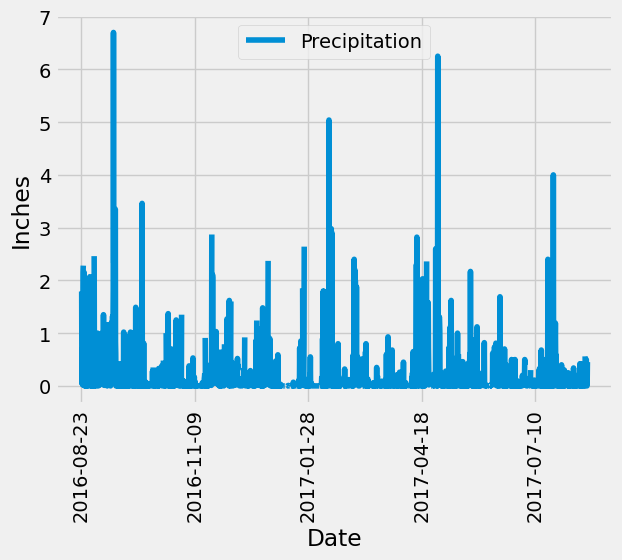

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year before the last date in data set.
one_yr_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
one_yr_ago

# Perform a query to retrieve the date and precipitation scores
date_precip_scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_yr_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(date_precip_scores, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
prcp_df = prcp_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(x='Date', y= 'Precipitation', rot=90)

# Create labels
plt.xlabel('Date')
plt.ylabel('Inches')

# Show the plot
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_summary_table = prcp_df.describe()
prcp_summary_table

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Measurement).group_by(Measurement.station).count()
print(total_stations)

9


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_counts = session.query(Measurement.station, func.count(Measurement.id).label('count')).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
for station, count in station_counts:
    print(f"{station},{count}")

USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [14]:
# Create a variable for the most active station
most_active_station = station_counts[0][0]

# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temps = session.query(
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).first()

temps

(54.0, 85.0, 71.66378066378067)

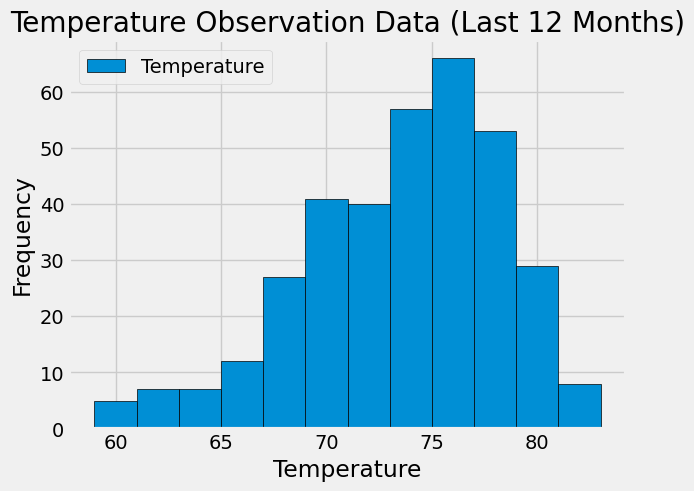

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps_query = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= one_yr_ago).filter(Measurement.station == most_active_station).all()

# Create dataframe to store results
temps_df = pd.DataFrame(temps_query, columns=['Date', 'Temperature'])

# Create histogram plot
temps_df.plot.hist(y='Temperature', bins=12, edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Observation Data (Last 12 Months)')
plt.show()


# Close Session

In [16]:
# Close Session
session.close()